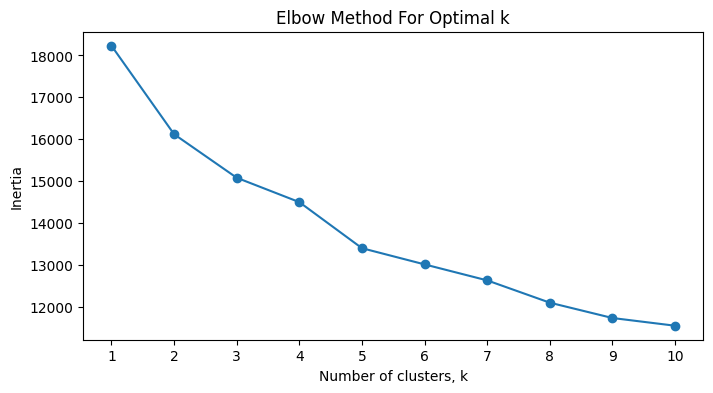

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
duration_ms             0
dtype: int64

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def convert_to_float(x):
    try:
        return pd.to_numeric(x.replace(',', ''))
    except AttributeError:
        return x

# Specify the file path of the CSV file
file_path = "data/updated_file.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

temp = df.drop(["genre", "track_name", "artist(s)_name"], axis=1)

categorical_features = ["key", "mode"]
numerical_features = ["artist_count" ,"released_year","released_month","released_day","in_spotify_playlists","in_spotify_charts","streams","in_apple_playlists","in_apple_charts","in_deezer_playlists","in_deezer_charts","in_shazam_charts","bpm","danceability_%","valence_%","energy_%","acousticness_%","instrumentalness_%","liveness_%","speechiness_%","duration_ms"]

for column in numerical_features:
    temp[column] = temp[column].apply(convert_to_float)

temp.dropna(inplace=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

prepared_data = preprocessor.fit_transform(temp)

inertias = []
k_values = range(1, 11)  # Typically, you test the range 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prepared_data)
    inertias.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.show()
temp.isnull().sum()